![alt text](DataKind_orange.png)

# Omidyar Extractives Project 1
## Exploratory Data Analysis (Notebook 3 of 5)
### 1. Reads in contract text and original metadata from Notebook 2
### 2. Computes basic stats on text and original metadata
### 3. Does topic modeling on text
### 4. Creates explanatory charts and graphs

In [33]:
import re
import string
import pandas as pd
from HTMLParser import HTMLParser
import nltk
from nltk.corpus import stopwords
from langdetect import detect

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [35]:
contracts = pd.read_pickle('contract_data/2_contracts_with_text.pkl')

In [36]:
contracts.columns

Index([u'OCID', u'Category', u'Contract Name', u'Contract Identifier',
       u'Language', u'Country Name', u'Resource', u'Contract Type',
       u'Signature Date', u'Document Type', u'Government Entity',
       u'Government Identifier', u'Company Name', u'Company Address',
       u'Jurisdiction of Incorporation', u'Registration Agency',
       u'Company Number', u'Corporate Grouping', u'Participation Share',
       u'Open Corporates Link', u'Incorporation Date', u'Operator',
       u'Project Title', u'Project Identifier', u'License Name',
       u'License Identifier', u'Source Url', u'Disclosure Mode',
       u'Retrieval Date', u'Pdf Url', u'Deal Number', u'Contract Note',
       u'Matrix Page', u'Annotation Category', u'Annotation Text',
       u'Contract_Text'],
      dtype='object')

In [ ]:
pd.set_option('max_colwidth',400)
contracts[contracts['TextLength'] < 5000][['OCID','Contract Type','Pdf Url','Contract_Text']]

In [31]:
contracts['Resource'].value_counts()

Hydrocarbons                                                           872
other minerals                                                         124
Gold                                                                    58
Cobalt;Copper                                                           45
Iron Ore                                                                35
Copper                                                                  29
Aluminum;Bauxite                                                        27
Gypsum                                                                  27
Gold;Copper                                                             24
Nickel                                                                  23
Copper;Gold                                                             20
Bauxite                                                                 18
Chromite;Nickel                                                         16
Diamonds;Gold            

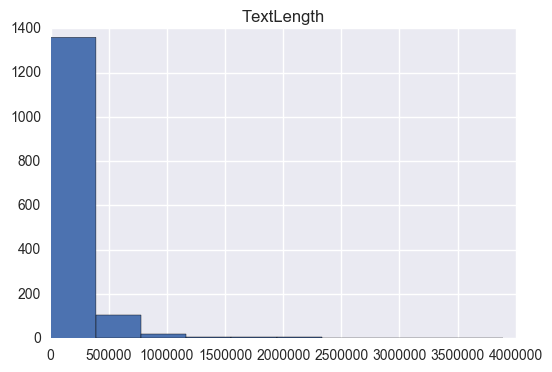

In [20]:
contracts.hist(column='TextLength');

### Detect Language

In [15]:
print "Contract Language counts:"
print contracts.Language.value_counts()

Contract Language counts:
en    665
fr    437
es    366
pt     20
ar      3
pl      1
Name: Language, dtype: int64


In [250]:
def detect_lang(row):
    text = doublespace_remove(''.join([i for i in row['CleanText'] if not i.isdigit()]))
    if row['Language'] == 'ar':
        return 'ar'
    elif 'accessdenied' in text[0:100]:
        return 'Error'
    else:
        try:
            return detect(text[len(text) / 2 - 1000: len(text) / 2 + 1000])
        except:
            print 'Error in OCID: ' + row['OCID']

In [251]:
contracts['DetectedLanguage'] = contracts.apply(detect_lang,axis=1)

In [266]:
print 'Detected Language different from reported language: ' + str(len(contracts[(contracts['DetectedLanguage'] != contracts['Language']) & (contracts['DetectedLanguage'] != 'Error')]))
print 'Contracts in english: ' + str(len(contracts[(contracts['DetectedLanguage'] == 'en') & (contracts['Language'] == 'en')]))
print 'Contracts with no txt: ' + str(len(contracts[contracts['DetectedLanguage'] == 'Error']))

Detected Language different from reported language: 78
Contracts in english: 593
Contracts with no txt: 25


In [253]:
contracts['DetectedLanguage'].value_counts()

en       601
fr       465
es       367
Error     25
pt        18
ro         4
ar         3
ca         3
pl         2
sw         1
it         1
tl         1
cy         1
Name: DetectedLanguage, dtype: int64

In [254]:
contracts[contracts['DetectedLanguage'] != contracts['Language']][['OCID','Language','DetectedLanguage']].groupby(['Language','DetectedLanguage']).agg(['count'])

OCID
                          count
Language DetectedLanguage      
en       Error                9
         cy                   1
         es                  14
         fr                  44
         pl                   1
         ro                   2
         tl                   1
es       Error                8
         ca                   1
         en                   4
fr       Error                8
         ca                   2
         en                   2
         it                   1
         ro                   2
         sw                   1
pt       en                   2

In [258]:
pd.set_option('max_colwidth',2000)
contracts[(contracts['Language'] == 'es') & (contracts['DetectedLanguage'] == 'en')][['OCID','CleanText']]

,OCID,CleanText
172,ocds-591adf-9753464836,ex 10 1 2 dex101 htm block 95 exploration and production contract english translation exhibit 10 1 license contract for the exploration and exploitation of hydrocarbons in block 95 perupetro s a and harken del per limitada license contract for the exploration and exploitation of hydrocarbons in block 95 perupetro s a and harken del per ltda preliminary clause general i by virtue of the authority conferred upon it by law no 26221 perupetro participates in this document to enter into the license contract for the exploration and exploitation of hydrocarbons in block 95 ii hydrocarbons in situ are the property of the state the ownership right to extracted hydrocarbons is transferred by perupetro to the contractor on the date of signing as stated in the contract and in article 8 of law no 26221 the contractor commits itself to pay to the state through perupetro a cash royalty under the conditions and at the time set forth in the contract iii in accordance with the provisions set forth in article 12 of law no 26221 the contract shall be governed by perus private law and shall be subject to the scope of article 1357 of the civil code iv for all purposes related to and arising from this contract the parties hereby agree that the captions of the clauses are irrelevant for purposes of the interpretation of the contents thereof v any reference to the contract includes the annexes should any conflict arise between the annexes and the body of the contract the latter shall prevail clause one definitions the definitions agreed upon by the parties in this clause are aimed at giving the required meaning to the terms used in the contract and such meaning shall be the only one accepted for purposes of interpretation in the performance hereof unless otherwise expressly agreed upon by the parties in writing 2 the terms defined and used in the contract whether in singular or plural shall be capitalized and shall have the following meanings 1 1 affiliate any entity fifty percent 50 ...
174,ocds-591adf-4582194938,ex 10 5 2 a05 6089 2ex10d5 htm ex 10 5 exhibit 10 5 amendment of license contract for exploration and exploitation of hydrocarbons on block z 1 entered by perupetro s a with bpz energy inc sucursal peru first clause 1 background 1 1 on november 30 2001 perupetro s a hereinafter perupetro entered into a license contract for exploration and exploitation of hydrocarbons in block z 1 with syntroleum per holdings limited sucursal del per and with bpz energy inc sucursal peru which was approved by supreme decree n 052 2001 em as mandated by law and made a public deed on november 30 2001 by its registration on the same date made by dr cecilia hidalgo morn a notary public of lima per 1 2 by means of supreme decree n 045 2002 em dated october 23 2002 approval was given to the modification of the license contract for exploration and exploitation of hydrocarbons in block z 1 which was also made a public deed on the same date by registration made by dr cecilia hidalgo morn a notary public of lima per 1 3 through supreme decree n 003 2004 em dated february 12 2004 approval was given to the modification and transferal or assignment of the contractual position in the license contract for the exploration and exploitation of hydrocarbons in block z 1 made by syntroleum per holdings limited sucursal del per which assigned all of its participation in the contract equivalent to ninety five percent 95 of participation in the contract to nuevo per ltd sucursal del per this modification and assignment of contractual position was made a public deed on march 18 2004 by dr ricardo fernandini barreda a notary public of lima per 1 1 4 by means of a letter dated november 5 2004 and in conformance with clause sixteen of the contract nuevo per ltd sucursal del per notified perupetro of its decision to assign its contractual position in the contract to bpz energy inc sucursal per 1 5 plains exploration production company acquired 